##  Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
%matplotlib inline

def cost_l2(x,y):              # ridge regression دائرة
    return x**2 + y**2


def cost_l1(x,y):              # lasso regression مربع
    return np.abs(x) + np.abs(y)


def costfunction(X,y,theta):   # OLS Kostfunktion -> look at OneNote
    m = np.size(y)
    h = X @ theta              # also h ist y-hat ! 
    J = float ((1./(2*m)) * (h - y).T @ (h - y));     # J ist Kosfunktion, die minimiert werden muss!
    return J;


def closed_form_solution(X,y): # تعطيك قيمة مصفوفة البيتات في الحالة العادية
    return np.linalg.inv(X.T @ X) @ X.T @ y


def closed_form_reg_solution(X,y,lamda = 10):    # تعطيك قيمة مصفوفة البيتات في الحالة الريدج واللاسو
    m,n = X.shape                                # حط ابعاد المصفوفة اكس ضمن المتغيرين 
    I = np.eye((n))                             # Return a 2-D array with ones on the diagonal and zeros elsewhere.

    return (np.linalg.inv(X.T @ X + lamda * I) @ X.T @ y)[:,0]


In [4]:
#X = np.array([[3,2,4],[5,6,7]])
#m,n=X.shape
#print(m,n)

2 3


In [5]:
# Simulation of some data
np.random.seed (245)
nobs =1000            # number of observation
x = 2 * np.random.rand(nobs , 1)
y = 2.5+ 2 * x + np.random.normal(loc=0, scale=1, size=nobs).reshape((nobs ,1)) # اعملي مصفوفة الوايات اللي رح ادرب فيها الخوارزمية لحتى اجيب المعاملات او مايسمى بالبيتات
X = np.c_[np.ones((nobs ,1)),x]   #اعملي مصفوفة الكسات اللي فيها العمود الاول ١ مشان وقت الضرب بمصفوفة البيتات المتوقعة يطلع معي قيمة واي المتوقعة 

In [8]:
#x
#X

In [14]:
lambda_range = np.logspace(0,8,num = 100)/1000  # create 100 verschiedene Lambdas ->Return numbers spaced evenly on a log scale.

theta_0_list_reg_l2 = []     # empty lists to save the results of Beta-hat using l2 ridge regression
theta_1_list_reg_l2 = []


for l in lambda_range:
    t0, t1 = closed_form_reg_solution(X,y,l)   # using previously defined function closed_form_reg_solution which contain regularization und return Beta-hat
    theta_0_list_reg_l2.append(t0)
    theta_1_list_reg_l2.append(t1)

    
    
lambda_range = np.logspace(0,4,num = 100)/1000 # create noch andere kleiner verschiedene 100 Lambdas!
theta_0_list_reg_l1 = []      # empty lists to save the results of Beta-hat using l1 lasso regression
theta_1_list_reg_l1 = []


for l in lambda_range:
    model_sk_reg = linear_model.Lasso(alpha=l, fit_intercept=False) # using lasso function
    model_sk_reg.fit(X,y)
    t0, t1 = model_sk_reg.coef_
    theta_0_list_reg_l1.append(t0)
    theta_1_list_reg_l1.append(t1)
    


In [13]:
np.logspace(2.0, 5.0 , num=5)

# In linear space, the sequence starts at ``base ** start`` (`base` to the power of `start`) and ends with ``base ** stop``
# num:     Number of samples to generate


array([   100.        ,    562.34132519,   3162.27766017,  17782.79410039,
       100000.        ])

In [15]:
# Setup of meshgrid of theta values

xx, yy = np.meshgrid(np.linspace(-0.5,5,100),np.linspace (-0.25,4.5,100))

#Computing the cost function for each theta combination
zz_l2 = np.array( [cost_l2(xi, yi )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L2
zz_l1 = np.array( [cost_l1(xi, yi )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L1
zz_ls = np.array( [costfunction(X, y.reshape(-1,1),np.array([t0,t1]). reshape(-1,1))
for t0, t1 in zip(np.ravel(xx), np.ravel(yy)) ] ) #least square

#Reshaping the cost values
Z_l2 = zz_l2.reshape(xx.shape)
Z_ls = zz_ls.reshape(xx.shape)
Z_l1 = zz_l1.reshape(xx.shape)

#Defining the global min of each function
min_ls = np.linalg.inv(X.T@X)@X.T@y
min_l2 = np.array ([0. ,0.])
min_l1 = np.array ([0. ,0.])

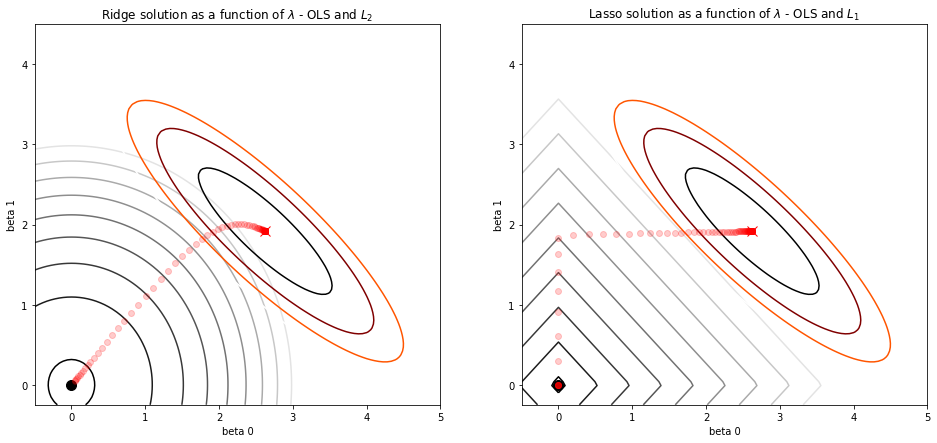

In [16]:
#Plotting the contours - L2
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)
ax.contour(xx, yy, Z_l2 , levels = np.linspace (0.1,10,10), cmap = 'gist_gray')
ax.contour(xx, yy, Z_ls , levels = np.linspace (0.6,1.1,4), cmap = 'gist_heat')
ax.set_xlabel('beta 0'), ax.set_ylabel('beta 1')
ax.set_title('Ridge solution as a function of $\\lambda$ - OLS and $L_2$ ')
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 10)
ax.plot(0,0, marker = 'o', color = 'black', markersize = 10)
ax.plot(theta_0_list_reg_l2 ,theta_1_list_reg_l2 , linestyle = 'none', marker = 'o',
color = 'red', alpha = .2)


#Plotting the contours - L1
ax = fig.add_subplot(1, 2, 2)
ax.contour(xx, yy, Z_l1 , levels = np.linspace (0.1,4,10), cmap = 'gist_gray')
ax.contour(xx, yy, Z_ls , levels = np.linspace (0.6,1.1,4), cmap = 'gist_heat')
ax.set_xlabel('beta 0'), ax.set_ylabel('beta 1')
ax.set_title('Lasso solution as a function of $\\lambda$ - OLS and $L_1$ ')
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 10)
ax.plot(0,0, marker = 'o', color = 'black', markersize = 10)
ax.plot(theta_0_list_reg_l1 ,theta_1_list_reg_l1 , linestyle = 'none', marker = 'o',
color = 'red', alpha = .2)